# Logistic Regression

In [1]:
from sklearn.datasets import load_iris
import pandas as pd

# Load the dataset
data = load_iris()
df = pd.DataFrame(data.data, columns=data.feature_names)

# Add the target column
df['species'] = data.target

# Display the first 5 rows
print(df.head())

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   species  
0        0  
1        0  
2        0  
3        0  
4        0  


using lamda (anon) function to change classses from something which is not computable to something which is computable; ie nnumeric 

In [3]:
# Remove Virginica (class 2)
df = df[df['species'] != 2]

# Re-label Versicolor as 1 (Not Setosa)
df['species'] = df['species'].apply(lambda x: 0 if x == 0 else 1)

# Display first 5 rows after simplification
print(df.head())

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   species  
0        0  
1        0  
2        0  
3        0  
4        0  


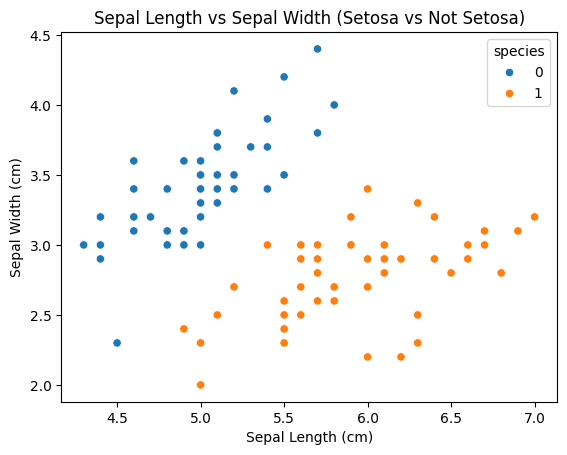

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.scatterplot(x=df['sepal length (cm)'], y=df['sepal width (cm)'], hue=df['species'])
plt.xlabel("Sepal Length (cm)")
plt.ylabel("Sepal Width (cm)")
plt.title("Sepal Length vs Sepal Width (Setosa vs Not Setosa)")
plt.show()

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [6]:
# Define the predictor (features) and target
X = df[['sepal length (cm)', 'sepal width (cm)']]
y = df['species']

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [7]:
# Create and train the model
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [8]:
# Predict on the test set
y_pred = model.predict(X_test)

In [9]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 1.00


In [10]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

Confusion Matrix:
[[12  0]
 [ 0  8]]


In [11]:
from sklearn.metrics import classification_report

report = classification_report(y_test, y_pred)
print("Classification Report:")
print(report)

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       1.00      1.00      1.00         8

    accuracy                           1.00        20
   macro avg       1.00      1.00      1.00        20
weighted avg       1.00      1.00      1.00        20



### Vis the decision Boundary

/home/batman/Code/ad-lab/VENV/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


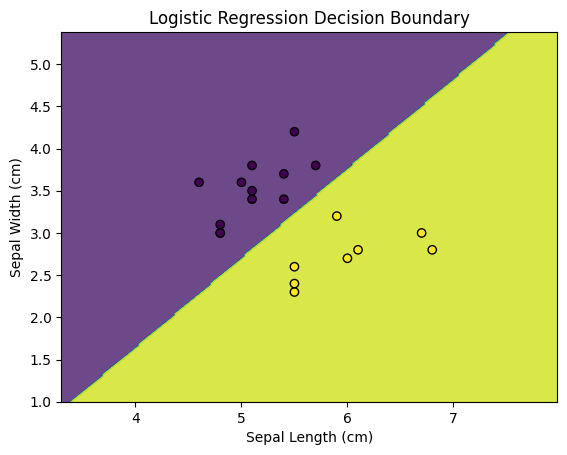

In [12]:
import numpy as np

# Create a mesh grid
h = 0.02  # Step size
x_min, x_max = X['sepal length (cm)'].min() - 1, X['sepal length (cm)'].max() + 1
y_min, y_max = X['sepal width (cm)'].min() - 1, X['sepal width (cm)'].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Predict on the mesh grid
Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot the decision boundary
plt.contourf(xx, yy, Z, alpha=0.8)
plt.scatter(X_test['sepal length (cm)'], X_test['sepal width (cm)'], c=y_test, edgecolor='k', marker='o')
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Sepal Width (cm)')
plt.title('Logistic Regression Decision Boundary')
plt.show()

### Final Predictions

In [13]:
new_flower = [[5.0, 3.5]]
prediction = model.predict(new_flower)
print(f"Predicted Class: {'Setosa' if prediction[0] == 0 else 'Not Setosa'}")

Predicted Class: Setosa


/home/batman/Code/ad-lab/VENV/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
